In [ ]:
import os

In [ ]:
os.listdir(r"C:\Users\danie\Documents\Master\TFM\images\allCells_crops\20190401_E2")
os.path.isdir(r"C:\Users\danie\Documents\Master\TFM\images")

In [4]:
folder = "/Users/dvarelat/Documents/MASTER/TFM/notebooks/testdata"

#### REVISAR ARCHIVOS QUE TENGAN SEGMENTACION (TARGET)

In [ ]:
c = 0
for subdir, dirs, files in os.walk(folder):
    if "crop" in subdir:
        # print(subdir)
        for file in files:
            if "target" in file:
                size_kb = os.path.getsize(os.path.join(subdir, file))/1024
                if size_kb > 22:
                    c+=1
                    print(subdir)
                    print("{} --> {}".format(file, round(size_kb, 3)))
                    print
                else: pass
        #print("------------")

In [ ]:
c

### READ IMAGES

In [2]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [6]:
os.listdir(folder)


['crop0_nuclei_seg_cellpose.nii.gz',
 '20190401_E2_T_x1116to1352_y315to551_z337to539_orig.nii.gz',
 '20190401_E2_DAPI_x1116to1352_y315to551_z337to539_decon.nii.gz',
 '20190401_E2_mGFP_x1116to1352_y315to551_z337to539_decon.nii.gz',
 'crop0_mem_seg_cellpose.nii.gz',
 '20190401_E2_T_x1116to1352_y315to551_z337to539_decon.nii.gz',
 '20190401_E2_mGFP_x1116to1352_y315to551_z337to539_orig.nii.gz',
 '20190401_E2_DAPI_x1116to1352_y315to551_z337to539_orig.nii.gz']

In [ ]:
for subdir, dirs, files in os.walk(folder):
    if "crop" in subdir:
        print(subdir)
        for file in files:
            if "DAPI" in file and "target" not in file:
                if "decon" in file: 
                    print(file)
                    file_path = os.path.join(subdir, file)
                    img = nib.load(file_path).get_fdata()
                    print(img.shape)

## Leer solo un CROP

In [7]:
folder = os.path.join(folder, )
imgPath = os.path.join(folder, '20190401_E2_DAPI_x1116to1352_y315to551_z337to539_decon.nii.gz')
img_crop = nib.load(imgPath).get_fdata()
np.min(img_crop), np.max(img_crop), img_crop.shape, type(img_crop)

(0.0, 173.0, (236, 236, 202), numpy.ndarray)

In [8]:
img_slice_crop = img_crop[:,:,100]
img_slice_crop.shape

(236, 236)

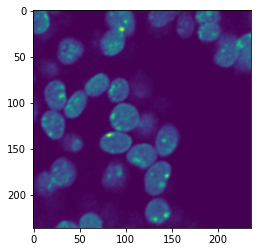

In [9]:
plt.imshow(img_slice_crop)
plt.show()

In [ ]:
from PIL import Image
img = Image.fromarray(img_slice_crop, 'RGB')
img.save('my.png')
img.show()

In [ ]:
import matplotlib.pyplot as plt
plt.imsave('filename1.jpeg', img_slice_crop)

### Imagen completa Downsampled

In [ ]:
folder = r"C:\Users\danie\Documents\Master\TFM\images\20190401_E2"
imgPath = os.path.join(folder, "20190401_E2_DAPI_decon_0.5.nii.gz")
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

In [ ]:
img_slice = img[:,:,100, 0]
img_slice.shape

In [ ]:
pd.DataFrame(img_slice[100:200,200:400])

In [ ]:
plt.imshow(img_slice)
plt.show()

### Read segmentation

In [ ]:
folder = r"C:\Users\danie\Documents\Master\TFM\images\allCells_crops\20190401_E2\crop6"
imgPath = os.path.join(folder, "target_nucl_mem.nii.gz")
img_target = nib.load(imgPath).get_fdata()
np.min(img_target), np.max(img_target), img_target.shape, type(img_target)

In [ ]:
img_target = img_target[:,:,100]
img_target.shape

In [ ]:
plt.imshow(img_target)
plt.show()

In [ ]:
pd.DataFrame(img_target[200:250, 50:70])

## NORMALIZATION

In [ ]:
cv2.imwrite("testing/test_slice_crop0_100.png", img_slice)

In [ ]:
img_rows = 256
img_cols = 256

In [ ]:
im = Image.open("testing/test_slice_crop0_100.png")
im = im.convert('L')     
im = im.resize((img_rows,img_cols)) 
im

In [ ]:
a = np.asarray(im)
a.shape

In [ ]:
### Segmentation

In [13]:
folder_ = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2_down"

In [10]:
from PIL import Image

In [4]:
folder = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2_down"
imgPath = os.path.join(folder, "20190401_E2_DAPI_decon_0.5.nii.gz")

In [3]:

img = nib.load(imgPath)
img.shape

NameError: name 'nib' is not defined

In [15]:
img

In [16]:
im = Image.open(imgPath)
im = im.convert('L')     
im = im.resize((256,256,256)) 
raw.append(np.array(im))

UnidentifiedImageError: cannot identify image file '/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2_down/20190401_E2_DAPI_decon_0.5.nii.gz'

In [1]:
import SimpleITK as sitk
import os

In [7]:
folder = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2_down"
imgPath = os.path.join(folder, "20190401_E2_DAPI_decon_0.5.nii.gz")


In [8]:
img1 = sitk.ReadImage(imgPath)

In [9]:
img1.GetDimension()
img1.GetDepth()
img1.GetHeight()
img1.GetDirection()
#img1.GetMetaDataKeys()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [ ]:
#help(img1)

In [10]:
img1.GetMetaData("xyzt_units")
for i in img1.GetMetaDataKeys():
    print(i)
    print(img1.GetMetaData(i))
    print("-------------")

ITK_FileNotes

-------------
ITK_original_direction
[UNKNOWN_PRINT_CHARACTERISTICS]

-------------
ITK_original_spacing
[UNKNOWN_PRINT_CHARACTERISTICS]

-------------
aux_file

-------------
bitpix
8
-------------
cal_max
255
-------------
cal_min
0
-------------
datatype
2
-------------
descrip

-------------
dim[0]
4
-------------
dim[1]
1024
-------------
dim[2]
1024
-------------
dim[3]
566
-------------
dim[4]
1
-------------
dim[5]
1
-------------
dim[6]
0
-------------
dim[7]
0
-------------
dim_info
0
-------------
intent_code
0
-------------
intent_name

-------------
intent_p1
0
-------------
intent_p2
0
-------------
intent_p3
0
-------------
nifti_type
1
-------------
pixdim[0]
0
-------------
pixdim[1]
0.853671
-------------
pixdim[2]
0.853671
-------------
pixdim[3]
0.99691
-------------
pixdim[4]
1
-------------
pixdim[5]
0
-------------
pixdim[6]
0
-------------
pixdim[7]
0
-------------
qform_code
0
-------------
qform_code_name
NIFTI_XFORM_UNKNOWN
-------------
qoffse

In [ ]:
img1.GetSize()

In [7]:
import cv2
import numpy as np
import h5py

In [20]:
f = h5py.File(filee, 'r')
# f.close()

In [ ]:
if f:
    print("file is open")
else:
    print("file is closed")

In [5]:
filee = r"C:\Users\danie\Documents\Master\TFM\notebooks\filename1_Simple Segmentation.h5"

In [8]:
f = h5py.File(filee, 'r')

In [17]:
with h5py.File(filee, "r") as f:
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    data = f["exported_data"]
    print(data)

Keys: <KeysViewHDF5 ['Nodes', 'exported_data']>
<HDF5 dataset "exported_data": shape (236, 236, 1), type "|u1">


In [9]:
data = np.array(f["exported_data"])

In [16]:
data[:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)

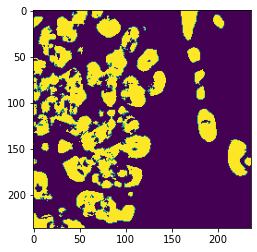

In [19]:
plt.imshow(data[:,:,0])
plt.show()

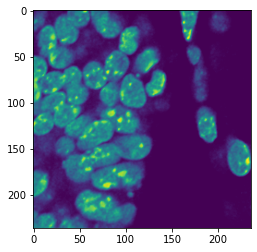

In [21]:
plt.imshow(img_slice_crop)
plt.show()

In [12]:
1/0.4

2.5

In [ ]:
data = np.array(dset[:,:,:])
file = 'test.jpg'
cv2.imwrite(file, data)

In [ ]:
folder = r"C:\Users\danie\Documents\Master\TFM\images\20190401_E2"
imgPath = os.path.join(folder, "20190401_E2_DAPI_decon_0.5.nii.gz")
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)